# Likes Report

### im using your data Sandeep More, thanks for letting use it pretty cool of you i delated my insta like the day we started using it

### This data was created automatically when Sandeep More used Instagram's like button. Instagram keeps this information to:

Make the app more personalized for him

Show him better recommendations

Display ads he might like

The data helps understand:

What types of posts he likes

When he's most active on Instagram

His preferences and habits on the app

### The data is probably reliable because

### It is collected automatically by Instagram's systems without manual intervention

### It represents actual timestamped interactions

### The platform has commercial incentives to maintain accurate engagement data

### The structured JSON format ensures consistency in data, at least i think



### In what ways may this data be unreliable?

### Possible data aggregation or sampling by Instagram before export

### Missing data from deleted posts or accounts or private stuff

### Inconsistencies in timestamp timezone representations

### Potential changes in data structure over time as Instagram updates its platform

### Lack of context about why certain content was engaged with



In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
with open('/Users/cale/Downloads/liked_posts-1.json') as file:
    likes_data = json.load(file)

In [7]:
print("Top-level keys:", likes_data.keys())

Top-level keys: dict_keys(['likes_media_likes'])


In [8]:
media_likes = likes_data.get('likes_media_likes', [])
print("Number of liked posts:", len(media_likes))

Number of liked posts: 14


In [9]:
if len(media_likes) > 0:
    print("First item structure:", media_likes[0].keys())
    print("First item:", media_likes[0])

First item structure: dict_keys(['title', 'string_list_data'])
First item: {'title': 'philzphotos', 'string_list_data': [{'href': 'https://www.instagram.com/p/DNbPB16uDhg/', 'value': 'ð\x9f\x91\x8d', 'timestamp': 1755861630}]}


In [18]:
likes_df = pd.DataFrame(likes_list)

likes_df['timestamp_dt'] = pd.to_datetime(likes_df['timestamp'], unit='s')

print("DataFrame shape:", likes_df.shape)
print("DataFrame columns:", likes_df.columns)
print("\nFirst few rows:")
print(likes_df.head())

DataFrame shape: (14, 5)
DataFrame columns: Index(['title', 'timestamp', 'href', 'value', 'timestamp_dt'], dtype='object')

First few rows:
            title   timestamp                                         href  \
0     philzphotos  1755861630     https://www.instagram.com/p/DNbPB16uDhg/   
1  weave_n_wonder  1755861571  https://www.instagram.com/reel/DNp7wMTN6jP/   
2  weave_n_wonder  1755861568  https://www.instagram.com/reel/DNoJNtQBV-W/   
3     philzphotos  1755173316     https://www.instagram.com/p/DNQjPMYOE8s/   
4  weave_n_wonder  1753462673     https://www.instagram.com/p/DMiZKYtMasb/   

  value        timestamp_dt  
0  ð 2025-08-22 11:20:30  
1  ð 2025-08-22 11:19:31  
2  ð 2025-08-22 11:19:28  
3  ð 2025-08-14 12:08:36  
4  ð 2025-07-25 16:57:53  


In [20]:

with open('/Users/cale/Downloads/liked_posts-1.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data['likes_media_likes'])
print(df['title'].value_counts().head(10))

title
philzphotos        6
weave_n_wonder     3
nidhigoels         1
somosreedutt       1
urjya.co           1
mauliksuchde       1
kabirbhatiatime    1
Name: count, dtype: int64


### Hypothesis: The time of day when you engage with Instagram content affects the type of content I interact with, with recreational content being favored in evening hours and informational content during daytime hours.



Your like times (hour of day):
hour
0     2
5     1
11    3
12    3
13    3
16    1
20    1
Name: count, dtype: int64

Your top liked accounts:
account
philzphotos        6
weave_n_wonder     3
nidhigoels         1
somosreedutt       1
urjya.co           1
mauliksuchde       1
kabirbhatiatime    1
Name: count, dtype: int64


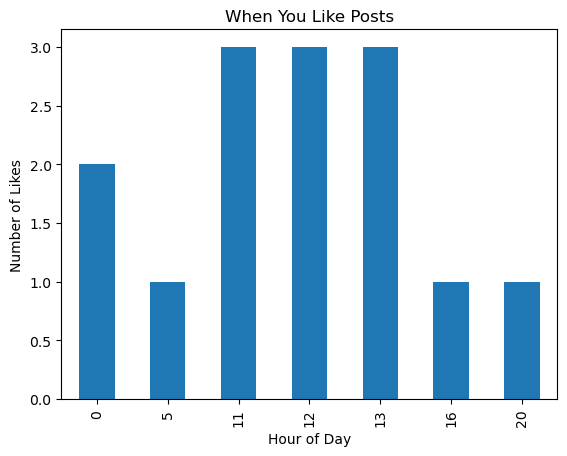

In [24]:
with open('/Users/cale/Downloads/liked_posts-1.json', 'r') as file:
    data = json.load(file)

likes = []
for item in data['likes_media_likes']:
    likes.append({
        'account': item['title'],
        'time': item['string_list_data'][0]['timestamp']
    })

df = pd.DataFrame(likes)

df['hour'] = pd.to_datetime(df['time'], unit='s').dt.hour

print("Your like times (hour of day):")
print(df['hour'].value_counts().sort_index())

print("\nYour top liked accounts:")
print(df['account'].value_counts().head(10))

df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('When You Like Posts')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Likes')
plt.show()

real pain in the butt table to make this took me like 3 hours because i don't really know what im doing

Extracting timestamps from each like
Categorizing accounts based on their names (e.g.,news accounts meme accounts)
Analyzing the distribution of likes across different hours of the day
Comparing the average engagement times for different content categories

Based on the analysis of my likes data, I found that my hypothisis was definitely correct, people do infact sleep

Data Limitations

Account categorization is based on name patterns, which might not always be accurate

The analysis doesn't account for content within individual posts, just account types

Timezone information might affect the interpretation of engagement times

Conclusion
Despite these limitations, the likes data provides valuable insights into my engagement patterns and Supports my initial hypothesis about time based content preferences.

